### Linear Discriminant Analysis <br>
Till now, we have mostly dealt and seen PCA for dimensionality reduction. It's an unsupervised algorithm which  is used for clustering and doesn't take into account target labels . What if, we need a method which take features as well as labels for clustering. Such a requirement is handled by LDA.

In this tutorial, we will see another dimesionality reduction technique called LDA and compare it with PCA. Later on, we will see how we can use LDA to do topic modelling and how we can cluster documents based on this topic modelling. Tutorial goes in three steps.
* **LDA**
* **LDA vs PCA**
* **Topic Modelling**

In [1]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA,LatentDirichletAllocation
import matplotlib.pyplot as plt

### PCA revisit

I will try to be as less technical as possible here.

If we have say 1000 features in our dataset. It is impossible to visualise them and too many features may lead to [curse of dimensionaliy](https://towardsdatascience.com/curse-of-dimensionality-2092410f3d27). It is primarily due to these issues we change our dataset to lower dimension.
Let's say we transform our dataset to 2 dimension data using PCA.These two new dimensions are called principal components. Now, our data originally will have variation in many directions. first component will be along the the direction of maximum variance and second component will be along the direction of second maximum variance. Each component will explain certain amount of variance of data.
 

### LDA(Linear Discriminant Analysis)  and LDA vs PCA

**LDA** is a dimesionality reduction tecnique.It transforms  data from  say 'n' dimensions to 'k'dimensions.   It is pretty similar to PCA in terms of in output but with one **major** difference. LDA is a supervised algorithm whereas PCA is not, PCA ignores **class labels**.

 As we know, PCA tries to find directions of maximum variance. PCA projects  data onto new axis in such a way they explain the maximum variance without taking class labels into consideration. **LDA** on the other hand, creates new axis in such a way that when we project data on this axis, there is a maximum separation bewtween two class categories. LDA tries to separate classes as much as feasible on the new axis. 
 
Below is the demonstration of same with Iris dataset.  

In [2]:
data=load_iris().data
target=load_iris().target
target_names=load_iris().target_names

In [3]:
dataframe=pd.DataFrame(data=np.concatenate((data,target.reshape(150,1)),axis=1),columns=['col_1','col_2','col_3','col_4','target'])

In [4]:
dataframe.head()

,col_1,col_2,col_3,col_4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
dataframe.drop(columns=['target'],axis=1,inplace=True)

In [6]:
pca = PCA (n_components=2)
X_feature_reduced = pca.fit(dataframe).transform(dataframe)

In [7]:
print ('First component explain {} variance of data and second component explain {} variance of data'.format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))

First component explain 0.9246187232017271 variance of data and second component explain 0.05306648311706783 variance of data


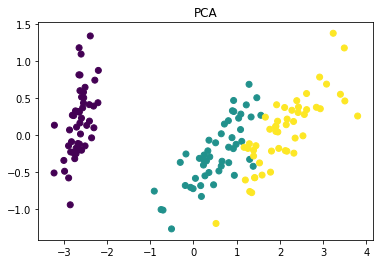

In [8]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title("PCA")
plt.show()

Now, let's analyse how dimesnionality reduction is done in LDA

In [9]:
lda = LatentDirichletAllocation(n_components=2)
X_feature_reduced = lda.fit(dataframe).transform(dataframe)

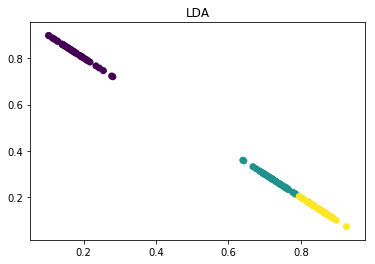

In [10]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title('LDA')
plt.show()

### Observation
As we can see from above that LDA projected data on new axis in such a way that class are separated as much as possible on the new axis.

#### How does LDA achieves this?

LDA creates new axis based on two criteria:
* Distance between means of classes
* Variation within each category

It projects data on new axis and finds mean for each class and variance for each class. It tries to maximise the distance between class means and tries to minimise the variation with each class. Using these into consideration we get a new axis.

<img src="https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bungn2im34a1bg89ogch4ck0itg96ddv/1555668000000/17997770589742191698/*/1nCniO6xSTL6XXMluJo45FdTiDSbhwpyu" width="500px">

Above is the data for two Genes, we want to project them on new axis with one dimension.


<img src="https://doc-14-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jq93dbg311mj8g829oauf672o0ou0fne/1555668000000/17997770589742191698/*/1I6DsctCgnYhwEIeV0n1-BF2i_4e_bviA" width="500px">

Now, while projecting the data on new axis, we want to maximise the mean distance and minimise the variation.


Criterion which we choose above to solve this is

**(µ1-µ2)^2
/(s1+s2)^2**

,where µ1 and µ2 are mean of each class and 's1 and s2' are variation/scatter within a class while making new axis

We try to **maximise** this criteria while making new axis.

### Topic modelling 

**Topic modelling**  is a method of assigning topic to each document. Each topic is made up of certain words.

Consider for example:

We have two topics, topic 1 and topic 2. **'Topic1'** is represented by 'apple, banana, mango' and **topic2** is represented by 'tennis, cricket, hockey'. We can infer that topic1 is talking about fruits and topic2 is talking about sports. We can assign new incoming document into one of these topics and that can be used for **clustering** purpose too. It is used in recommendation systems and many more. 

Another  example: 
Consider we have 6 documents
* apple banana
* apple orange
* banana orange
* tiger cat
* tiger dog
* cat dog

What topic modelling would do is if want to extract say two topic out of these  documents, it will give two distributions, topic-word distribution and doc-topic distribution.  In topic-word representation it should give word wise distribution for each topic and in doc-topic it would give for each document, it's topic representation or distribution of document for each topic.

It's ideal topic-word distribution should be:

|  Topic | Apple | Banana | Orange | Tiger | Cat | Dog | 
| --- | --- | --- | --- | --- | --- | --- | 
| Topic 1 |   .33 | .33 | .33 | 0 | 0 | 0 |
| Topic 2 |   0 | 0 | 0 | 0.33 | 0.33 | 0.33 |

and it's ideal document-topic distrubution should be:

|  Topic | doc1 | doc2 | doc3 | doc4 | doc5 | doc6 | 
| --- | --- | --- | --- | --- | --- | --- | 
| Topic 1 |   1 | 1 | 1 | 0 | 0 | 0 |
| Topic 2 |   0 | 0 | 0 | 1 | 1 | 1 |

and now suppose we have a new document say, ' cat dog apple', its topic wise representation should be


**Topic1:  0.33**

**Topic2: 0.63**


LDA is highly used for this purpose.It's usage for topic  modelling has been demonstrated below. We give to it the number of topics we want to find out of the corpus. Remember it follow bow approach therefore, relationship between words are lost in this manner.


In [11]:
lemmatizer=WordNetLemmatizer() #For words Lemmatization
stop_words=set(stopwords.words('english'))

In [12]:
def TokenizeText(text):
    ''' 
     Tokenizes text by removing various stopwords and lemmatizing them
    '''
    text=re.sub('[^A-Za-z0-9\s]+', '', text)
    word_list=word_tokenize(text)
    word_list_final=[]
    for word in word_list:
        if word not in stop_words:
            word_list_final.append(lemmatizer.lemmatize(word))
    return word_list_final

In [13]:
def gettopicwords(topics,cv,n_words=10):
    '''
        Print top n_words for each topic.
        cv=Countvectorizer
    '''
    for i,topic in enumerate(topics):
        top_words_array=np.array(cv.get_feature_names())[np.argsort(topic)[::-1][:n_words]]
        print ("For  topic {} it's top {} words are ".format(str(i),str(n_words)))
        combined_sentence=""
        for word in top_words_array:
            combined_sentence+=word+" "
        print (combined_sentence)
        print (" ")

In [14]:
import os
os.listdir("../input/million-headlines/")

['abcnews-date-text.csv']

In [15]:
df=pd.read_csv('../input/million-headlines/abcnews-date-text.csv',usecols=[1])

In [16]:
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [17]:
%%time 
num_features=100000
cv=CountVectorizer(tokenizer=TokenizeText,max_features=num_features,ngram_range=(1,2))
transformed_data=cv.fit_transform(df['headline_text'])

CPU times: user 3min 37s, sys: 2.61 s, total: 3min 40s
Wall time: 3min 40s


In [18]:
%%time
no_topics=10  ## We can change this, hyperparameter
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(transformed_data)

CPU times: user 1h 43s, sys: 1.77 s, total: 1h 45s
Wall time: 1h 45s


**Lda.components_** is a topic_word table, it shows representation of each word in the topic. components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i. It can also be viewed as distribution over the words for each topic after normalization

In [19]:
gettopicwords(lda.components_,cv)

For  topic 0 it's top 10 words are 
woman government fire charged trump final state may man deal 
 
For  topic 1 it's top 10 words are 
u sydney attack home death dy minister worker tasmania news 
 
For  topic 2 it's top 10 words are 
australia sa adelaide day set make mine abc dead 2015 
 
For  topic 3 it's top 10 words are 
man court win world south qld face canberra cup charge 
 
For  topic 4 it's top 10 words are 
australian wa queensland country hit north cut west service missing 
 
For  topic 5 it's top 10 words are 
say crash found perth china family brisbane house labor funding 
 
For  topic 6 it's top 10 words are 
police plan rural market change open show farmer indigenous share 
 
For  topic 7 it's top 10 words are 
new interview council school car one two take drug test 
 
For  topic 8 it's top 10 words are 
nsw election melbourne report coast sex accused gold killed tasmanian 
 
For  topic 9 it's top 10 words are 
year child call first health hour get national hospital nt 

### Assigning new topic 
We can see that each document is a combination of each topic. Let's see topic representation of first ten documents.
First ten documents and their topicwise representation is shown below.

In [20]:
docs=df['headline_text'][:10]

In [21]:
data=[]
for doc in docs:
    data.append(lda.transform(cv.transform([doc])))

In [22]:
cols=['topic'+str(i) for i in range(1,11)]
doc_topic_df=pd.DataFrame(columns=cols,data=np.array(data).reshape((10,10)))

In [23]:
doc_topic_df['major_topic']=doc_topic_df.idxmax(axis=1)
doc_topic_df['raw_doc']=docs

In [24]:
doc_topic_df.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,major_topic,raw_doc
0,0.016667,0.016667,0.016667,0.016667,0.683334,0.016667,0.183332,0.016667,0.016667,0.016667,topic5,aba decides against community broadcasting lic...
1,0.887500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,topic1,act fire witnesses must be aware of defamation
2,0.012500,0.762499,0.012500,0.012500,0.012500,0.012503,0.012500,0.012500,0.012500,0.137499,topic2,a g calls for infrastructure protection summit
3,0.009091,0.009092,0.009091,0.009091,0.918181,0.009091,0.009091,0.009091,0.009091,0.009091,topic5,air nz staff in aust strike for pay rise
4,0.010000,0.010000,0.010000,0.010000,0.910000,0.010000,0.010000,0.010000,0.010000,0.010000,topic5,air nz strike to affect australian travellers


In [25]:
print ("Complete")

Complete


We saw how LDA can be used for topic modelling. This can be used for document custering based on the doc topic  representation.

### References
[Statquest LDA](https://www.youtube.com/watch?v=azXCzI57Yfc)

[https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)

[https://sebastianraschka.com/faq/docs/lda-vs-pca.html](https://sebastianraschka.com/faq/docs/lda-vs-pca.html)

